Load data. Has a total stellar mass cut of $10^9$ (completeness limit for the observations) 

In [35]:
#Sets plot defaults
import matplotlib
matplotlib.rcParams['font.size'] = (20)
matplotlib.rcParams['figure.figsize'] = (10,7)

import numpy as np
from dragons import meraxes
import os
import matplotlib.pyplot as plt
import sys
import ContourPlot as cp

#Setup
cosmo = {'omega_M_0' : 0.308,
'omega_lambda_0' : 0.692,
'omega_b_0' : 0.04839912,
'omega_n_0' : 0.0,
'N_nu' : 0,
'h' : 0.678,
'n' : 0.968,
'sigma_8' : 0.815
}
data_folder='/home/mmarshal/data_dragons/'
meraxes_loc='/output/meraxes.hdf5'

#filename='bulges_update1102_full'
#snapshot=158
filename='bulges_tiamat125'
snapshot=213
gals=meraxes.io.read_gals(data_folder+filename+meraxes_loc,\
                                          snapshot=snapshot,props=['StellarMass',\
                                          'BulgeStellarMass','StellarDiskScaleLength',\
                                          'GhostFlag','Type'],\
                                          h=cosmo['h'],quiet=True)
gals=gals[gals["GhostFlag"]==0]
gals=gals[gals["Type"]==0]
gals=gals[gals['StellarMass']*1e10>1e9]

Plot M vs R relations for complete galaxy sample

/home/mmarshal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/mmarshal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


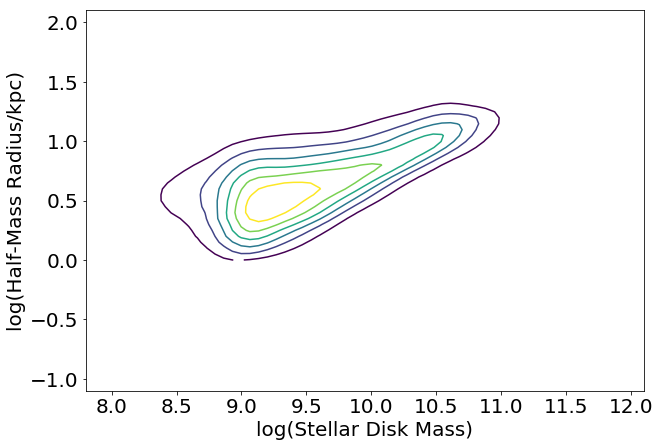

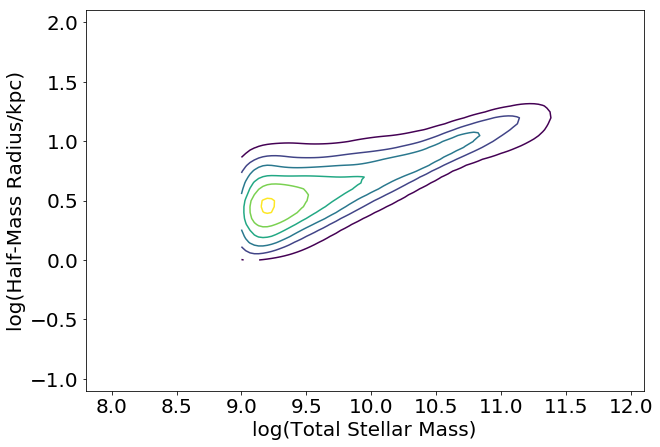

In [36]:
disk_mass=np.log10((gals['StellarMass']-gals['BulgeStellarMass'])*1e10)
half_mass_rad=np.log10(1.67835*gals['StellarDiskScaleLength']*1000)


cp.contour_plot(disk_mass,half_mass_rad,'log(Stellar Disk Mass)','log(Half-Mass Radius/kpc)',[7.8,12.1],[-1.1,2.1])
plt.show()

total_mass=np.log10(gals['StellarMass']*1e10)

cp.contour_plot(total_mass,half_mass_rad,'log(Total Stellar Mass)','log(Half-Mass Radius/kpc)',[7.8,12.1],[-1.1,2.1])
plt.show()

Plot M vs R relations for disk-dominated galaxies

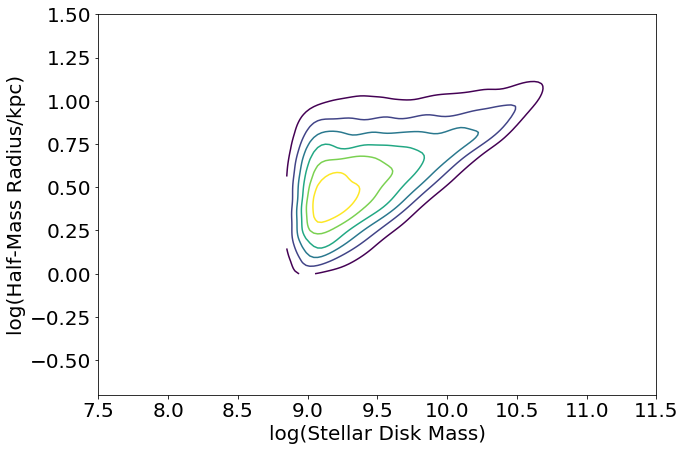

In [37]:
disks=gals[gals['BulgeStellarMass']/gals['StellarMass']<0.3]
disk_mass=np.log10((disks['StellarMass']-disks['BulgeStellarMass'])*1e10)
half_mass_rad=np.log10(1.67835*disks['StellarDiskScaleLength']*1000)

cp.contour_plot(disk_mass,half_mass_rad,'log(Stellar Disk Mass)','log(Half-Mass Radius/kpc)',[7.5,11.5],[-0.7,1.5])
plt.show()
